In [168]:
##Importing all dependencies

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from keras import regularizers 

In [169]:
##Reading the data

import pandas as pd
data = pd.read_csv('C:/Users/Keerthi Ningegowda/Desktop/bd2_data/data.csv')
X = data[['Z']]


In [170]:
##Performing Z-normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True,with_std=True)
X = scaler.fit_transform(X)

In [171]:
##Denoising the data using moving averages

movAvg = pd.DataFrame(data=X[:],
                     columns = ['Zmovavg'])
movAvg = movAvg.rolling(window=1).mean().dropna()

In [172]:
##Defining and fitting the neural network

model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(5, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(5, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(10, activation = 'relu', kernel_regularizer=regularizers.l2(0.01)))
#model.add(Dense(12, activation='relu',kernel_regularizer=regularizers.l2(0.01)))# Multiple output neurons
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='adam')
record = model.fit(movAvg,movAvg,batch_size=10,validation_split = 0.1,epochs=50)

Train on 82342 samples, validate on 9150 samples
Epoch 1/50
82342/82342 [==============================] - 12s 151us/sample - loss: 0.0985 - val_loss: 0.0575
Epoch 2/50
82342/82342 [==============================] - 10s 118us/sample - loss: 0.0559 - val_loss: 0.0506
Epoch 3/50
82342/82342 [==============================] - 9s 114us/sample - loss: 0.0504 - val_loss: 0.0489
Epoch 4/50
82342/82342 [==============================] - 10s 120us/sample - loss: 0.0463 - val_loss: 0.0411
Epoch 5/50
82342/82342 [==============================] - 10s 119us/sample - loss: 0.0433 - val_loss: 0.0404
Epoch 6/50
82342/82342 [==============================] - 9s 112us/sample - loss: 0.0411 - val_loss: 0.0411
Epoch 7/50
82342/82342 [==============================] - 9s 110us/sample - loss: 0.0393 - val_loss: 0.0393
Epoch 8/50
82342/82342 [==============================] - 9s 109us/sample - loss: 0.0379 - val_loss: 0.0366
Epoch 9/50
82342/82342 [==============================] - 9s 111us/sample - loss: 0

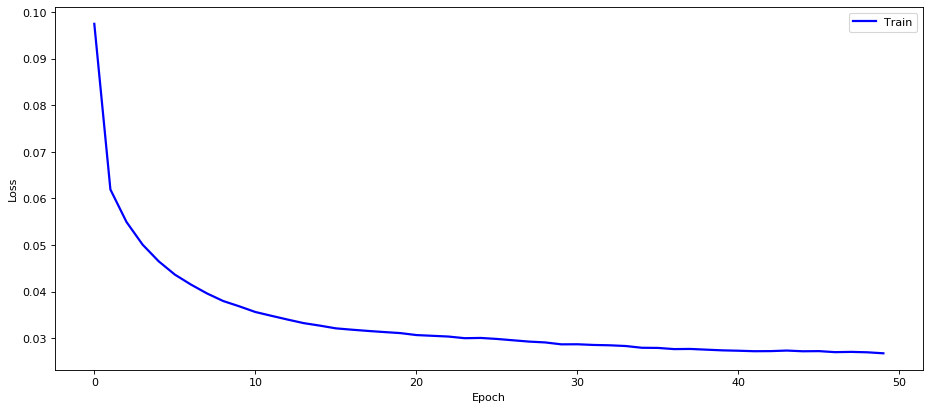

In [123]:
##Plotting the training loss

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,6), dpi=80)
ax.plot(record.history['loss'],'b',label='Train',linewidth=2)
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend()
plt.show()

In [173]:
##Calculating the reconstruction error

import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Y_true = movAvg['Zmovavg']
Y_pred = model.predict(Y_true)

predicted_data = pd.DataFrame(columns=['Y_true','Y_pred','abs_error'])

predicted_data['Y_true'] = Y_true
predicted_data['Y_pred'] = Y_pred
predicted_data['abs_error'] = np.abs(predicted_data['Y_true']-predicted_data['Y_pred'])


In [174]:
##Seting the threshold

threshold = np.percentile(predicted_data['abs_error'], 95)
print(threshold)

0.012026821815617872


In [92]:
##Saving the model

model_name = 'ANN_Elevator.h5'
model.save(model_name)
print('Saved trained model at %s ' % model_name)
model_json = model.to_json()
with open("ANN_model.json", "w") as json_file:
    json_file.write(model_json)

Saved trained model at ANN_Elevator.h5 


In [57]:
# Load the model
from tensorflow.python.keras.models import model_from_json
json_file = open('ANN_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("ANN_Elevator.h5")
print("Loaded model from disk")

Loaded model from disk


In [189]:
##Creating confusion matrix

from sklearn.metrics import confusion_matrix

tn,fp,fn,tp = confusion_matrix(new_data['Anomaly'],error_df['label']).ravel()

In [190]:
#Caculation precision,recall, and f1 score
precision = tp/(tp + fp)
recall = tp/(tp + fn) 
f1_score = (2*(precision * recall))/(precision + recall)

In [201]:
print('True positive:',tp)
print('True negative:',tn)
print('False positive:',fp)
print('False negative:',fn)

True positive: 21
True negative: 1441
False positive: 30
False negative: 28


In [202]:
print('Precsion:',precision)
print('F1 score:',f1_score)

Precsion: 0.4117647058823529
F1 score: 0.42
